### Import packages

In [115]:
    include("fwmodule.jl")    
    using Pkg
    using .FWmodule
    using DifferentialEquations
    using DiffEqFlux
    using OrdinaryDiffEq
    using Lux
    using Optim
    using GalacticOptim
    using Optimization
    using ComponentArrays
    using DiffEqSensitivity
    using Flux.Losses: mae, mse, logitcrossentropy
    using LinearAlgebra
    using DelimitedFiles
    using Random
    using Statistics
    using Plots
    gr()
    using Optimization, OptimizationOptimisers, OptimizationOptimJL
    using SBMLToolkit, ModelingToolkit
    using Catalyst, Latexify
    using DynamicHMC
    using Turing

   Resolving package versions...
  No Changes to `C:\Users\marce\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\marce\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\marce\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\marce\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\marce\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\marce\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\marce\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\marce\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\marce\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\marce\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\marce\.julia\environments\v1.8\Project.toml`
  No Changes to 

### Import SBML model

In [116]:
filepath = "model.sbml"
lvl = 2
version = 4
mdl = FWmodule.import_sbml(filepath, lvl, version)

SBML.Model with 2 reactions, 7 species, and 6 parameters.

In [117]:
# Define Reactions system, ODE system, Reactions vector, Species vector and ODE Functions
rs, odesys, reactionsvector, speciesvector, ode_func = FWmodule.define_model(mdl);
speciesvector

┌ Warning: SBMLToolkit currently fires events regardless of uppass or downpass trigger.
└ @ SBMLToolkit C:\Users\marce\.julia\packages\SBMLToolkit\L2qXg\src\events.jl:28


7-element Vector{Term{Real, Base.ImmutableDict{DataType, Any}}}:
 Species0(t)
 Species1(t)
 Species6(t)
 Species3(t)
 Species2(t)
 Species7(t)
 Species4(t)

In [118]:
rs

Model ##SBML#1283
States (7):
  Species0(t) [defaults to 2.5e-5]
  Species1(t) [defaults to 0.0]
  Species6(t) [defaults to 0.0]
  Species3(t) [defaults to 0.0]
  Species2(t) [defaults to 0.0]
  Species7(t) [defaults to 0.0]
⋮
Parameters (7):
  Reaction0_Km [defaults to 0.0007]
  Reaction1_A
  Reaction1_Km [defaults to 0.0002]
  Reaction0_A
  Reaction0_Vmax [defaults to 2.23333e-7]
  Reaction1_Vmax [defaults to 5.0e-7]
⋮

┌ Warning: Latexify currently ignores constraint equations.
└ @ Catalyst C:\Users\marce\.julia\packages\Catalyst\S5Um3\src\latexify_recipes.jl:105


In [119]:
odesys

Model ##SBML#1283 with 7 equations
States (7):
  Species0(t) [defaults to 2.5e-5]
  Species1(t) [defaults to 0.0]
  Species6(t) [defaults to 0.0]
  Species3(t) [defaults to 0.0]
  Species2(t) [defaults to 0.0]
  Species7(t) [defaults to 0.0]
⋮
Parameters (7):
  Reaction0_Km [defaults to 0.0007]
  Reaction1_A
  Reaction1_Km [defaults to 0.0002]
  Reaction0_A
  Reaction0_Vmax [defaults to 2.23333e-7]
  Reaction1_Vmax [defaults to 5.0e-7]
⋮

In [120]:
reactionsvector 

2-element Vector{Reaction}:
 (Reaction1_A*Reaction1_Vmax) / (Reaction1_A + Reaction1_Km), Species1 + Species6 ⇒ Species7 + Species3 + Species4
 (Reaction0_A*Reaction0_Vmax) / (Reaction0_A + Reaction0_Km), Species0 + Species1 ⇒ Species2 + Species3 + Species4

In [121]:
speciesvector 

7-element Vector{Term{Real, Base.ImmutableDict{DataType, Any}}}:
 Species0(t)
 Species1(t)
 Species6(t)
 Species3(t)
 Species2(t)
 Species7(t)
 Species4(t)

In [122]:
ode_func

(::ODEFunction{true, SciMLBase.AutoSpecialize, ModelingToolkit.var"#f#486"{RuntimeGeneratedFunctions.RuntimeGeneratedFunction{(:ˍ₋arg1, :ˍ₋arg2, :t), ModelingToolkit.var"#_RGF_ModTag", ModelingToolkit.var"#_RGF_ModTag", (0x9bc23ed8, 0x1da1d7cc, 0xc5495fc0, 0xd5b81b3a, 0x0b4e7d44)}, RuntimeGeneratedFunctions.RuntimeGeneratedFunction{(:ˍ₋out, :ˍ₋arg1, :ˍ₋arg2, :t), ModelingToolkit.var"#_RGF_ModTag", ModelingToolkit.var"#_RGF_ModTag", (0xf749e5ea, 0x712db876, 0x031fb160, 0x1f63cd1d, 0x9b7bca85)}}, UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Vector{Symbol}, Symbol, Vector{Symbol}, ModelingToolkit.var"#498#generated_observed#494"{Bool, ODESystem, Dict{Any, Any}}, Nothing, ODESystem}) (generic function with 1 method)

In [123]:
# Setting the initial concentrations
u0 = zeros(7)
u0[1] = 10.0;      # Species0
u0[2] = 5.0;       # Species1 
u0[3] = 8.0;       # Species6
u0[4] = 0.0;       # Species3
u0[5] = 0.0;       # Species2
u0[6] = 0.0;       # Species7
u0[7] = 0.0;      # Species4

# Selected Species
selected_species = [1, 2, 3, 4, 5, 6, 7];

In [124]:
len_param = length(reactionparams(rs))
paramsvector = reactionparams(rs)[1:len_param-1]

6-element Vector{Sym{Real, Base.ImmutableDict{DataType, Any}}}:
 Reaction0_Km
 Reaction1_A
 Reaction1_Km
 Reaction0_A
 Reaction0_Vmax
 Reaction1_Vmax

In [125]:
# Define Params (based on the SBML file information and the order from the last block)
# Obs: value '0.0' cause posterior errors if in any parameter variable, substitute it with 0.1 if necessary
#                       0_km,   1_A, 1_km,   0_A,       0_Vmax,      1_Vmax
#model_param = Float32.([0.0007, 1, 0.0002, 1, 0.0000002233333, 0.0000005]);
model_param = Float32.([0.7, 1, 0.2, 1, 0.2233333, 0.5]);

In [126]:
# Generating the time series with a simulation 
tspan = (0.0f0, 10.0f0); method = Rosenbrock23();
abstol= 1e-12; reltol=1e-6; saveat = 0.1;
X, t = FWmodule.gen_timeseries(tspan, odesys, u0, model_param, method, abstol, reltol, saveat);

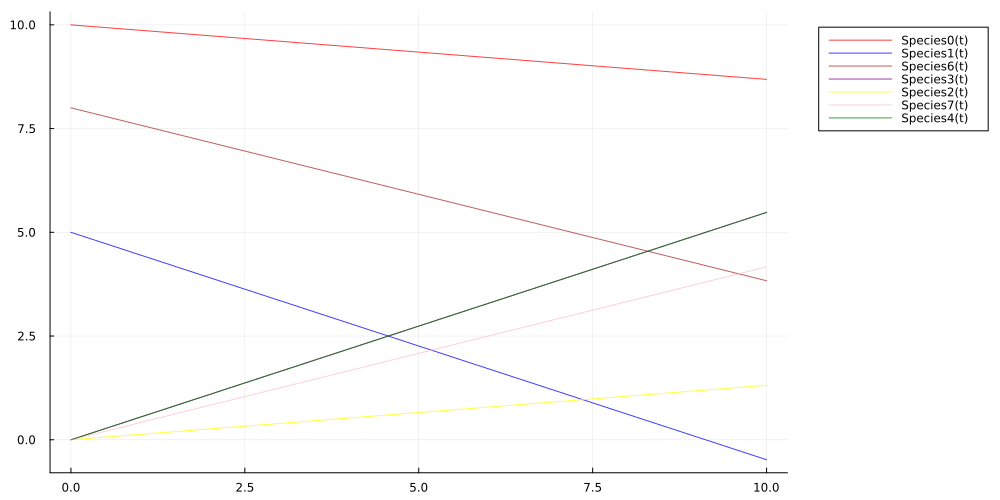

In [127]:
# Plotting
default(size = (1000, 500))
plot(
    t, X', alpha=0.75, 
    legend=:outertopright,
    labels=permutedims(speciesvector),
    ls=permutedims([:solid,:solid,:solid,:solid,:solid,:solid,:solid]),
    color=permutedims([:red, :blue, :brown, :purple, :yellow, :pink, :green])
)

### Import the cutout model

In [128]:
# Import cutout model
mdl2 = FWmodule.import_sbml("cutmodel.sbml", 2, 4)

SBML.Model with 1 reactions, 7 species, and 3 parameters.

In [129]:
# Generate reaction 
rs2, odesys2, reactionsvector2, speciesvector2, ode_func2 = FWmodule.define_model(mdl2);
speciesvector2

┌ Warning: SBMLToolkit currently fires events regardless of uppass or downpass trigger.
└ @ SBMLToolkit C:\Users\marce\.julia\packages\SBMLToolkit\L2qXg\src\events.jl:28


7-element Vector{Term{Real, Base.ImmutableDict{DataType, Any}}}:
 Species0(t)
 Species1(t)
 Species6(t)
 Species3(t)
 Species2(t)
 Species7(t)
 Species4(t)

In [130]:
u0_2 = zeros(7)
u0_2[1] = 10.0;      # Species0
u0_2[2] = 5.0;       # Species1 
u0_2[3] = 8.0;       # Species6
u0_2[4] = 0.0;       # Species3
u0_2[5] = 0.0;       # Species2
u0_2[6] = 0.0;       # Species7
u0_2[7] = 0.0;      # Species4

selected_species2 = [1, 2, 3, 4, 5, 6, 7];

In [131]:
len_param2 = length(reactionparams(rs2))
paramsvector2 = reactionparams(rs2)[1:len_param2-1]

3-element Vector{Sym{Real, Base.ImmutableDict{DataType, Any}}}:
 Reaction1_A
 Reaction1_Km
 Reaction1_Vmax

In [132]:
# Params
## Obs: value '0.0' cause posterior errors if in any parameter variable, substitute it with 0.1 if necessary
#                        1_A,  1_Km,    1_Vmax
#model_param2 = Float32.([0.1, 0.0002, 0.0000005]);
model_param2 = Float32.([0.1, 0.2, 0.5]);

In [133]:
# Generating the time series with a simulation
tspan2 = (0.0f0, 10.0f0);
method2 = Rosenbrock23();
abstol2= 1e-12; reltol2=1e-6; saveat2 = 0.1;
X_2, t_2 = FWmodule.gen_timeseries(tspan2, odesys2, u0_2, model_param2, method2, abstol2, reltol2, saveat2);

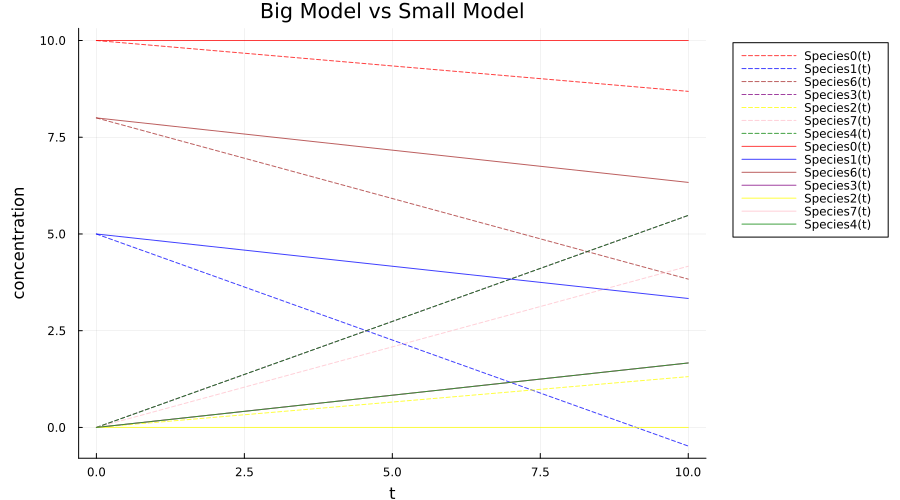

In [134]:
# Plotting
default(size = (900, 500));
plot(
    t, 
    X'[:, selected_species],
    alpha=0.75, legend=:outertopright,
    labels=permutedims(speciesvector),
    color=permutedims([:red, :blue, :brown, :purple, :yellow, :pink, :green]),
    ls=:dash,
)
xlabel!("t")
ylabel!("concentration")
plot!(
    t_2, 
    X_2'[:, selected_species2],
    title="Big Model vs Small Model",
    alpha=0.75, legend=:outertopright,
    labels=permutedims(speciesvector2),
    color=permutedims([:red, :blue, :brown, :purple, :yellow, :pink, :green]),
    left_margin=5Plots.mm
)

### Turning ODE's into a system of UDE's

In [135]:
# Defining the neural network characteristics
rng = Random.default_rng(12345)

U = Lux.Chain(
    Lux.Dense(7, 7, Lux.sigmoid),   
    Lux.Dense(7, 7, Lux.sigmoid),
    Lux.Dense(7, 7, Lux.sigmoid),
    Lux.Dense(7, 7)                 
)

nn_p, nn_st = Lux.setup(rng, U);

# Converting to UDE's
nn_dynamics!(du, u, p, t) = FWmodule.ude_dynamics!(du, u, model_param2, p, nn_st, t_2, ode_func2, U)

nn_dynamics! (generic function with 1 method)

### Training the model

In [136]:
# Generating predict and loss functions parameters
prob_nn = ODEProblem(nn_dynamics!, u0_2, tspan2, nn_p);
method = AutoVern7(Rodas4())
abstol=1e-6; reltol=1e-6; saveat = 0.1;
X_val = view(X_2, :, 1:50)
N = size(X_2)[2]
X_train = view(X_2, :, 51:N)
N_val = size(X_val)[2]
N_train = size(X_train)[2]
_step = 1
val_losses = Float32[];

callback(θ,l) = begin # Callback to show the loss during training
    push!(losses, l)
    println(IJulia.orig_stdout[], "Current loss after $(length(losses)) iterations: $(losses[end])")

    # Evaluate the model on the validation set
    val_loss = FWmodule.loss(θ, prob_nn, method, abstol, reltol, saveat, N_val, X_val, _step, selected_species2)
    push!(val_losses, val_loss)
    println(IJulia.orig_stdout[], "Current validation loss after $(length(val_losses)) iterations: $(val_losses[end])")

    false
end

callback (generic function with 1 method)

In [137]:
# Train with ADAM 
losses = Float32[];
maxiters = 2000;

adtype = Optimization.AutoForwardDiff()
optf = Optimization.OptimizationFunction((x,p)->(FWmodule.loss(x, prob_nn, method, abstol, reltol, saveat, N_train, X_train, _step, selected_species2)), adtype)
optprob = Optimization.OptimizationProblem(optf, ComponentVector{Float64}(nn_p))

res1 = Optimization.solve(
    optprob, 
    ADAM(0.1), 
    maxiters = maxiters, 
    callback = callback,
    progress = true
)
loss_adam_end = size(losses)[1];
println("Training loss after $(length(losses)) iterations: $(val_losses[end])");
lossval_adam_end = size(val_losses)[1]
println("Validation loss after $(length(losses)) iterations: $(val_losses[end])");

loss: 0.257: 100%|██████████████████████████████████████| Time: 0:00:35


Training loss after 2001 iterations: 0.40874556
Validation loss after 2001 iterations: 0.40874556


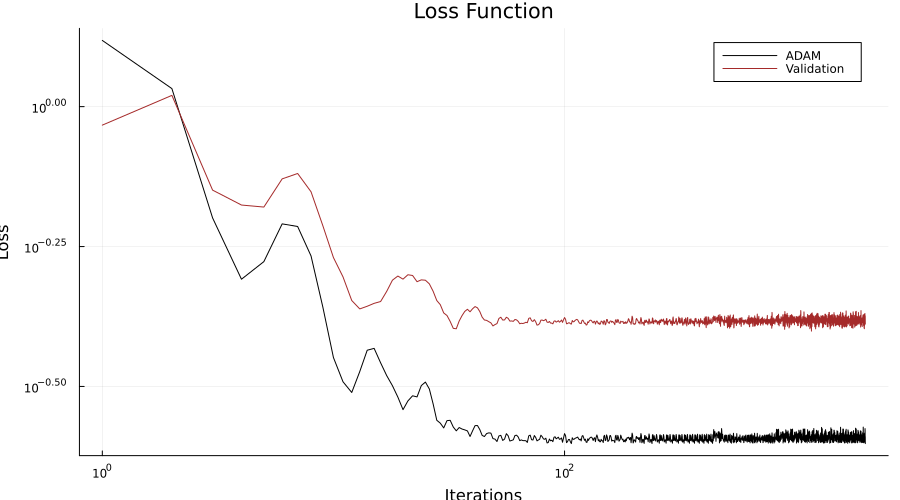

In [138]:
# Plot losses

default(size = (900, 500));
plot(
    1:loss_adam_end, losses[1:loss_adam_end], 
    yaxis = :log10, xaxis = :log10, 
    label = "ADAM", color = :black,
    title = "Loss Function"
);

plot!(
    1:lossval_adam_end, val_losses[1:lossval_adam_end], 
    yaxis = :log10, xaxis = :log10, 
    label = "Validation", color = :brown,
    title = "Loss Function"
);

xlabel!("Iterations")
ylabel!("Loss")

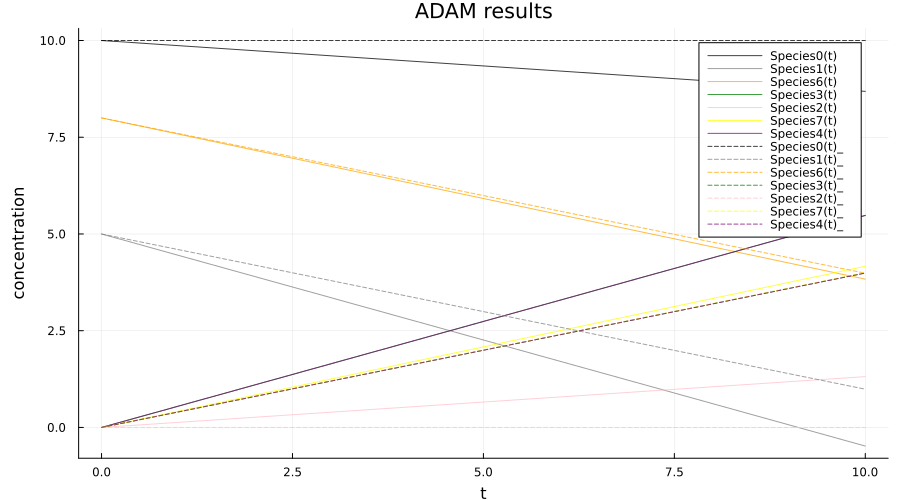

In [139]:
# Plot the trained model
tp = res1.minimizer;
X3 = Array(FWmodule.predict(tp, prob_nn, method, abstol, reltol, saveat));

default(size = (900, 500))
plot(
    t, 
    X'[:, selected_species],
    title = "ADAM results",
    alpha=0.75, 
    labels=permutedims(speciesvector),
    ls=permutedims([:solid,:solid,:solid,:solid,:solid,:solid,:solid,:solid,:solid,:solid]),
    color=permutedims([:black, :grey, :orange, :green, :pink, :yellow, :purple, :brown, :blue, :red])
)

xlabel!("t")
ylabel!("concentration")
speciesvector2_ = [string(s)*"_" for s in speciesvector2]
plot!(
    t, 
    X3',
    alpha=0.75,
    labels=permutedims(speciesvector2_),
    ls=:dash,
    color=permutedims([:black, :grey, :orange, :green, :pink, :yellow, :purple, :brown, :blue, :red]),
    left_margin=5Plots.mm
)

In [140]:
# Obtenha os índices de tempo correspondentes aos momentos desejados
momentos_desejados = [1, 5, 10]
indices_momentos = [findmin(abs.(t .- momento))[2] for momento in momentos_desejados]

# Print species values in moments 5, 10 and 20
for i in selected_species
    println("Espécie: ", speciesvector[i])
    for j in 1:length(momentos_desejados)
        momento = momentos_desejados[j]
        indice = indices_momentos[j]
        valor = X[i, indice]
        println("Tempo ", momento, ": ", valor)
    end
    println()
end

Espécie: Species0(t)
Tempo 1: 9.8686274706504
Tempo 5: 9.343137367447738
Tempo 10: 8.686274704685925

Espécie: Species1(t)
Tempo 1: 4.451960789306487
Tempo 5: 2.2598040057519544
Tempo 10: -0.4803921145195371

Espécie: Species6(t)
Tempo 1: 7.583333333557247
Tempo 5: 5.916666712810022
Tempo 10: 3.8333333298061536

Espécie: Species3(t)
Tempo 1: 0.5480392106935121
Tempo 5: 2.7401959942480456
Tempo 10: 5.480392114519537

Espécie: Species2(t)
Tempo 1: 0.13137252934959873
Tempo 5: 0.6568626325522621
Tempo 10: 1.3137252953140757

Espécie: Species7(t)
Tempo 1: 0.41666666644275197
Tempo 5: 2.0833332871899777
Tempo 10: 4.1666666701938455

Espécie: Species4(t)
Tempo 1: 0.5480392106935121
Tempo 5: 2.7401959942480456
Tempo 10: 5.480392114519537



In [141]:
# Get the time indices corresponding to the desired moments
desired_moments = [1, 5, 10]
i_moments = [findmin(abs.(t .- moment))[2] for moment in desired_moments]

# Print species values in moments 5, 10 and 20
for i in selected_species2
    println("Especies: ", speciesvector2[i])
    for j in 1:length(desired_moments)
        moment = desired_moments[j]
        indice = i_moments[j]
        value = X3[i, indice]
        println("Time ", moment, ": ", value)
    end
    println()
end

Espécie: Species0(t)
Tempo 1: 10.00001858149394
Tempo 5: 10.000092974687552
Tempo 10: 10.000186230610218

Espécie: Species1(t)
Tempo 1: 4.598919565634719
Tempo 5: 2.994597558923273
Tempo 10: 0.9891939708616397

Espécie: Species6(t)
Tempo 1: 7.5986513046748145
Tempo 5: 5.993256251851885
Tempo 10: 3.9865113475369114

Espécie: Species3(t)
Tempo 1: 0.39931243329160715
Tempo 5: 1.9965622895516315
Tempo 10: 3.993125113802788

Espécie: Species2(t)
Tempo 1: -2.4343226206725403e-5
Tempo 5: -0.00012183671707937997
Tempo 10: -0.0002441779795922832

Espécie: Species7(t)
Tempo 1: 0.4003104847769707
Tempo 5: 2.0015526446695673
Tempo 10: 4.003106233320261

Espécie: Species4(t)
Tempo 1: 0.39908259634542825
Tempo 5: 1.9954131609605417
Tempo 10: 3.9908270917888475



# SGD Method

In [142]:
mdl3 = FWmodule.import_sbml("cutmodel.sbml", 2, 4)
rs3, odesys3, reactionsvector3, speciesvector3, ode_func3 = FWmodule.define_model(mdl3);
u0_3 = zeros(7)
u0_3[1] = 10.0;      # Species0
u0_3[2] = 5.0;       # Species1 
u0_3[3] = 8.0;       # Species6
u0_3[4] = 0.0;       # Species3
u0_3[5] = 0.0;       # Species2
u0_3[6] = 0.0;       # Species7
u0_3[7] = 0.0;      # Species4

selected_species3 = [1, 2, 3, 4, 5, 6, 7];
len_param3 = length(reactionparams(rs3))
paramsvector3 = reactionparams(rs3)[1:len_param3-1]
model_param3 = Float32.([0.1, 0.2, 0.5]);

tspan3 = (0.0f0, 10.0f0);
method3 = Rosenbrock23();
abstol3= 1e-12; reltol3=1e-6; saveat3 = 0.1;
X_3, t_3 = FWmodule.gen_timeseries(tspan3, odesys3, u0_3, model_param3, method3, abstol3, reltol3, saveat3);

# Defining the neural network characteristics
rng3 = Random.default_rng(12345)

U3 = Lux.Chain(
    Lux.Dense(7, 7, Lux.sigmoid),   
    Lux.Dense(7, 7, Lux.sigmoid),
    Lux.Dense(7, 7, Lux.sigmoid),
    Lux.Dense(7, 7)                 
)

nn_p3, nn_st3 = Lux.setup(rng3, U3);

# Converting to UDE's
nn_dynamics3!(du, u, p, t) = FWmodule.ude_dynamics!(du, u, model_param3, p, nn_st3, t_3, ode_func3, U3)

# Generating predict and loss functions parameters
prob_nn3 = ODEProblem(nn_dynamics3!, u0_3, tspan3, nn_p3);
method3 = AutoVern7(Rodas4())
abstol3=1e-6; reltol3=1e-6; saveat3 = 0.1;
X_val3 = view(X_3, :, 1:50)
N3 = size(X_3)[2]
X_train3 = view(X_3, :, 51:N3)
N_val3 = size(X_val3)[2]
N_train3 = size(X_train3)[2]
_step3 = 1
val_losses3 = Float32[];

callback3(θ,l3) = begin # Callback to show the loss during training
    push!(losses3, l3)
    println(IJulia.orig_stdout[], "Current loss after $(length(losses3)) iterations: $(losses3[end])")

    # Evaluate the model on the validation set
    val_loss3 = FWmodule.loss(θ, prob_nn3, method3, abstol3, reltol3, saveat3, N_val3, X_val3, _step3, selected_species3)
    push!(val_losses3, val_loss3)
    println(IJulia.orig_stdout[], "Current validation loss after $(length(val_losses3)) iterations: $(val_losses3[end])")

    false
end

┌ Warning: SBMLToolkit currently fires events regardless of uppass or downpass trigger.
└ @ SBMLToolkit C:\Users\marce\.julia\packages\SBMLToolkit\L2qXg\src\events.jl:28


callback3 (generic function with 1 method)

In [143]:
# Train with SGD
losses3 = Float32[];
maxiters3 = 2000;

adtype3 = Optimization.AutoForwardDiff()
optf3 = Optimization.OptimizationFunction((x,p)->(FWmodule.loss(x, prob_nn3, method3, abstol3, reltol3, saveat3, N_train3, X_train3, _step3, selected_species3)), adtype3)
optprob3 = Optimization.OptimizationProblem(optf3, ComponentVector{Float64}(nn_p3))

res3 = Optimization.solve(
    optprob3,
    GradientDescent(),
    maxiters=maxiters3,
    callback=callback3,
    progress=true
)

loss_sgd_end = size(losses3)[1];
println("Training loss after $(length(losses3)) iterations: $(losses3[end])");
lossval_sgd_end = size(val_losses3)[1]
println("Validation loss after $(length(val_losses3)) iterations: $(val_losses3[end])");

Training loss after 2001 iterations: 0.25024742
Validation loss after 2001 iterations: 0.4115661


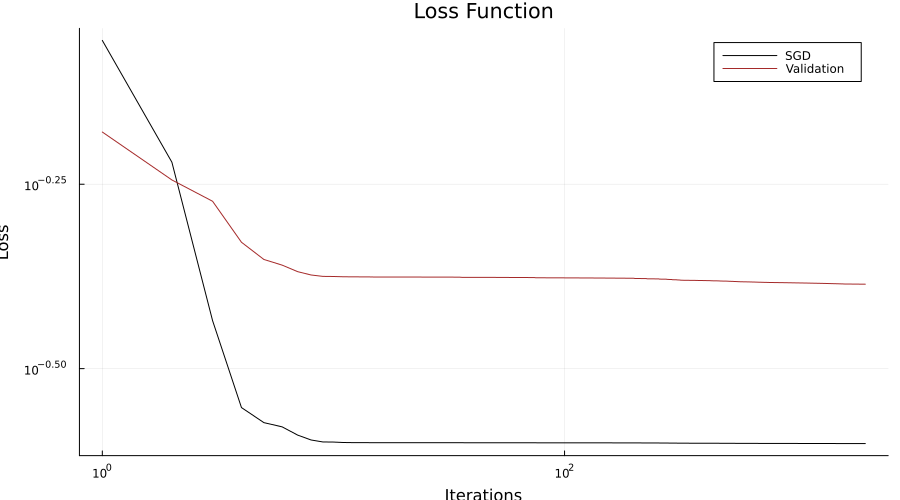

In [144]:
# Plot losses

default(size = (900, 500));
plot(
    1:loss_sgd_end, losses3[1:loss_sgd_end], 
    yaxis = :log10, xaxis = :log10, 
    label = "SGD", color = :black,
    title = "Loss Function"
);

plot!(
    1:lossval_sgd_end, val_losses3[1:lossval_sgd_end], 
    yaxis = :log10, xaxis = :log10, 
    label = "Validation", color = :brown,
    title = "Loss Function"
);

xlabel!("Iterations")
ylabel!("Loss")

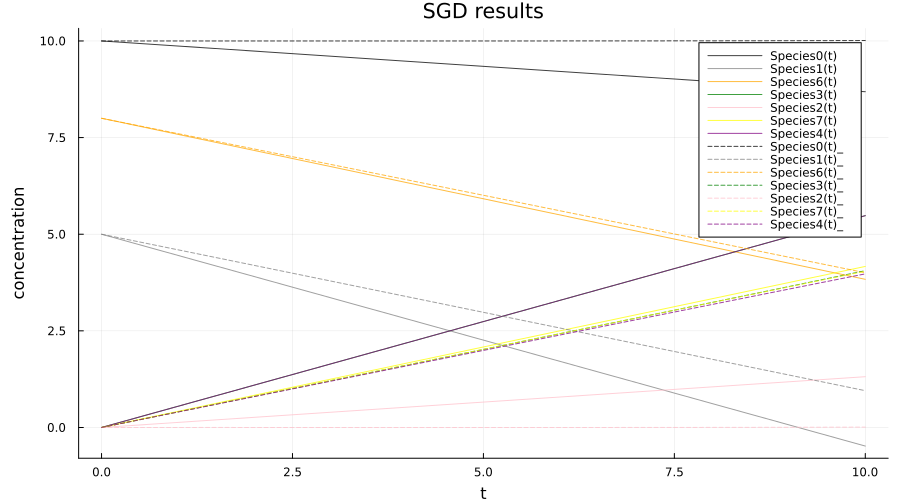

In [145]:
# Plot the trained model
tp3 = res3.minimizer;
X33 = Array(FWmodule.predict(tp3, prob_nn3, method3, abstol3, reltol3, saveat3));

default(size = (900, 500))
plot(
    t, 
    X'[:, selected_species],
    title = "SGD results",
    alpha=0.75, 
    labels=permutedims(speciesvector3),
    ls=permutedims([:solid,:solid,:solid,:solid,:solid,:solid,:solid,:solid,:solid,:solid]),
    color=permutedims([:black, :grey, :orange, :green, :pink, :yellow, :purple, :brown, :blue, :red])
)

xlabel!("t")
ylabel!("concentration")
speciesvector3_ = [string(s)*"_" for s in speciesvector3]
plot!(
    t, 
    X33',
    alpha=0.75,
    labels=permutedims(speciesvector3_),
    ls=:dash,
    color=permutedims([:black, :grey, :orange, :green, :pink, :yellow, :purple, :brown, :blue, :red]),
    left_margin=5Plots.mm
)

In [146]:
# Get the time indices corresponding to the desired moments
desired_moments = [1, 5, 10]
i_moments = [findmin(abs.(t .- moment))[2] for moment in desired_moments]

# Print species values in moments 5, 10 and 20
for i in selected_species3
    println("Especies: ", speciesvector3[i])
    for j in 1:length(desired_moments)
        moment = desired_moments[j]
        indice = i_moments[j]
        value = X33[i, indice]
        println("Time ", moment, ": ", value)
    end
    println()
end

Espécie: Species0(t)
Tempo 1: 10.000073516894238
Tempo 5: 10.000119807725701
Tempo 10: 10.011338709444768

Espécie: Species1(t)
Tempo 1: 4.59712832511277
Tempo 5: 2.979262556363798
Tempo 10: 0.9525461087848295

Espécie: Species6(t)
Tempo 1: 7.602729041427457
Tempo 5: 6.007412528760923
Tempo 10: 4.003511433360792

Espécie: Species3(t)
Tempo 1: 0.40366425925928895
Tempo 5: 2.0202655697188443
Tempo 10: 4.056316543818729

Espécie: Species2(t)
Tempo 1: 0.0003374642857766759
Tempo 5: -0.000247557874617017
Tempo 10: 0.010054687526586203

Espécie: Species7(t)
Tempo 1: 0.40481211742973955
Tempo 5: 2.022455402132805
Tempo 10: 4.041515515284511

Espécie: Species4(t)
Tempo 1: 0.3992731075896359
Tempo 5: 1.9935105512127063
Tempo 10: 3.974194478911134



### Model Selection

In [147]:
# Calculate solutions numerically
sol_nn = solve(prob_nn, method2, abstol=abstol2, reltol=reltol2, saveat=saveat2)
sol_sgd_nn = solve(prob_nn3, method3, abstol=abstol3, reltol=reltol3, saveat=saveat3)


# Calculate metrics for the trained model and the traditional SBML model
best_model = FWmodule.calculate_metrics(sol_nn, sol_sgd_nn, X_2, nn_p, model_param)

# Shows the selected model
best_model

010203

"m2"

In [149]:
# Part 1: MAE calculation
mae_nn1 = FWmodule.calculate_mae(Array(sol_nn), X_2)
mae_nn2 = FWmodule.calculate_mae(Array(sol_sgd_nn), X_2)
        if mae_nn1 > mae_nn2
            best_mae = "Model 2"
        else
            best_mae = "Model 1"
        end

# Part 2: R² calculation
r2_nn1 = FWmodule.calculate_r2(Array(sol_nn), X_2)
r2_nn2 = FWmodule.calculate_r2(Array(sol_sgd_nn), X_2)
        if r2_nn1 > r2_nn2
            best_r2 = "Model 1"
        else
            best_r2 = "Model 2"
        end

# Part 3: BIC calculation
num_parameters_nn1 = length(nn_p)
num_parameters_nn2 = length(model_param)
num_data_points = length(X_2)
bic_nn1 = FWmodule.calculate_bic(Array(sol_nn), X_2, num_parameters_nn1, num_data_points)
bic_nn2 = FWmodule.calculate_bic(Array(sol_sgd_nn), X_2, num_parameters_nn2, num_data_points)
        if bic_nn1 > bic_nn2
            best_bic = "Model 2"
        else
            best_bic = "Model 1"
        end

# Print the results
println("Metrics for Model 1:")
println("MAE: ", mae_nn1)
println("R²: ", r2_nn1)
println("BIC: ", bic_nn1)
println()
println("Metrics for Model 2:")
println("MAE: ", mae_nn2)
println("R²: ", r2_nn2)
println("BIC: ", bic_nn2)
println()
println("Best model R2: ", best_r2)
println("Best model MAE: ", best_mae)
println("Best model BIC: ", best_bic)
println()
println("Best model in general: ", best_model)

Metrics for Model 1:
MAE: 1.8974887212088765
R²: 0.26149926815347446
BIC: 1624.0984314247828

Metrics for Model 2:
MAE: 1.3486289054483902
R²: 0.6823304088675329
BIC: 1040.7880304989087

Best model R2: Model 2
Best model MAE: Model 2
Best model BIC: Model 2

Best model in general: m2
